In [4]:
import pandas as pd # 분석용 파이썬 라이브러리 패키지
import numpy as np # 계산용 파이썬 라이브러리 패키지
import matplotlib as mpl
import matplotlib.pyplot as plt # 시각화 파이썬 라이브러리 패키지
import seaborn as sns # 시각화 파이썬 라이브러리 패키지 as는 seaborn을 sns로 쓰겠다는 말

data = pd.read_csv("C:/BigData/work/R_Project/ch011/Rpython/data_comb.csv", encoding="euc-kr")
data = data.drop('Unnamed: 0', axis=1) 
data

,District,Police,CCTV,Oneperson,Pub,Crime
0,강남구,0.177215,155.518987,1001,5,186
1,강동구,0.284669,110.614071,1078,5,154
2,강북구,0.211864,125.423729,1048,3,117
3,강서구,0.048263,63.634170,1135,3,107
4,관악구,0.304363,114.643219,2082,6,178
5,광진구,0.117233,182.356389,1919,1,211
6,구로구,0.447316,190.954274,1287,2,208
7,금천구,0.537634,174.807988,1497,4,200
8,노원구,0.225734,61.258465,924,1,106
9,도봉구,0.048426,81.549637,942,1,106


In [5]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

formula='Crime ~ Police + CCTV + Oneperson + Pub'
lm = ols(formula, data).fit()
print(anova_lm(lm))

# 분산분석 = ANOVA
# 집단간의 차이를 검정한다
# 집단 간 통계량값을 집단 내 통계량값으로 나눈 값
# degree of freedom = 자유도
# sum of squares = 제곱합
# mean squares =  평균제곱
# f-statistic =  f값
# pr은 f의 p-value값

# T-test 를 하게 되면 T, P 값이
# ANOVA 를 하게 되면 F, P 값이
# 회귀분석에서는 F, T, P 값이
# 교차분석에서는 X^2, P 값이 나오게 된다.
# 이렇게 T 값이 계산되어 나왔을때 원래는 p값을 찾는데 이걸 컴퓨터가 해주므로
# ex) 집단간 통계량값을 집단 내 통계량값으로 나눈게 t값인데
# ex) 이 T 값을 가지고 어떤 기준치(기각역, 임계치 라고 함)와 서로 비교를 하게 되는데,
# 그 기준치는 유의수준이 0.05가 되게 하는 값이다.

# 그러니까 사실 T값은 P값임
# Residual는 잔차, 회귀식과 관측값 사이에 나타나는 차이
# 출처 : https://blog.naver.com/ooohai/20096182642

             df        sum_sq       mean_sq          F    PR(>F)
Police      1.0   9308.368838   9308.368838  14.477678  0.001110
CCTV        1.0  20509.309413  20509.309413  31.898949  0.000016
Oneperson   1.0   2826.561825   2826.561825   4.396265  0.048937
Pub         1.0  28880.834938  28880.834938  44.919517  0.000002
Residual   20.0  12858.924986    642.946249        NaN       NaN


In [6]:
cor = data.corr() # 수치적 상관관계를 파악할때
cor
# 상관계수는 0.3 ~ 0.7 사이 뚜렷한 양적 선형관계
# 0.7과 1.0 사이는 강한 양적 선형관계, 상관계수는 -1~1 사이로 나옴.

,Police,CCTV,Oneperson,Pub,Crime
Police,1.000000,0.538724,0.538954,-0.043823,0.353750
CCTV,0.538724,1.000000,0.471818,0.116897,0.632955
Oneperson,0.538954,0.471818,1.000000,-0.025203,0.462501
Pub,-0.043823,0.116897,-0.025203,1.000000,0.676197
Crime,0.353750,0.632955,0.462501,0.676197,1.000000


C:\Users\user\AppData\Local\Temp/ipykernel_19156/3297347528.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(cor, dtype=np.bool)


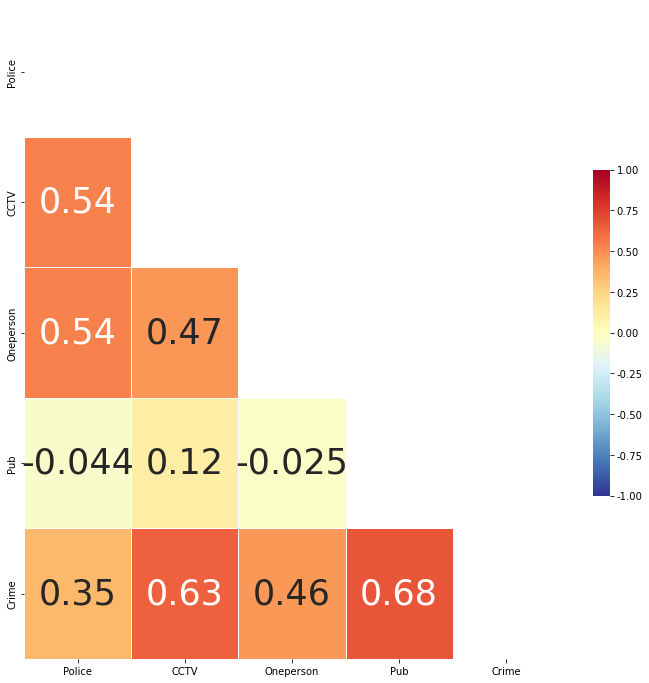

In [7]:
# ---------- 상관분석 시각화

mpl.rcParams['axes.unicode_minus'] = False # - 깨지는 현상

fig, ax = plt.subplots( figsize=(12,12) ) # 한번에 여러 그래프 보여줌 subplots

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(cor, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(cor, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1,   # 컬러바 범위 -1 ~ 1,
            annot_kws={'size':35}
           )  
plt.show()

In [8]:
import statsmodels.formula.api as smf

res = smf.ols(formula='Crime ~ Police + CCTV + Oneperson + Pub', data=data).fit()
# res.summary()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Crime   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     23.92
Date:                Thu, 16 Jun 2022   Prob (F-statistic):           2.21e-07
Time:                        13:35:34   Log-Likelihood:                -113.51
No. Observations:                  25   AIC:                             237.0
Df Residuals:                      20   BIC:                             243.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.0152     18.862      1.167      0.2

In [10]:
dataa = data.drop( "Police", axis=1)
dataa = dataa.drop("District", axis=1)
dataa

,CCTV,Oneperson,Pub,Crime
0,155.518987,1001,5,186
1,110.614071,1078,5,154
2,125.423729,1048,3,117
3,63.634170,1135,3,107
4,114.643219,2082,6,178
5,182.356389,1919,1,211
6,190.954274,1287,2,208
7,174.807988,1497,4,200
8,61.258465,924,1,106
9,81.549637,942,1,106


In [11]:
# 데이터 표준화

from sklearn.preprocessing import StandardScaler
# Standardization 평균 0 / 분산 1

scaler = StandardScaler()   
scaler = scaler.fit_transform(dataa)

scaler = pd.DataFrame(scaler)
scaler

# 출처 : https://mizykk.tistory.com/101

,0,1,2,3
0,0.462198,-0.710183,0.371621,0.381324
1,-0.502849,-0.527293,0.371621,-0.205328
2,-0.184576,-0.598549,-0.117354,-0.883644
3,-1.512490,-0.391907,-0.117354,-1.066972
4,-0.416259,1.857402,0.616109,0.234661
5,1.038959,1.470245,-0.606330,0.839645
6,1.223735,-0.030878,-0.361842,0.784646
7,0.876737,0.467913,0.127134,0.637984
8,-1.563546,-0.893073,-0.606330,-1.085305
9,-1.127471,-0.850320,-0.606330,-1.085305


In [ ]:
from sklearn.cluster import KMeans

ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(scaler)
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.figure(figsize=(4, 4))

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('')
plt.xticks(ks)
plt.show()

In [ ]:
# 자동으로 k를 찾는 k-means

from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(scaler)

# !pip install -U yellowbrick

# !pip uninstall scikit-learn -y 해결~^^ ㅠㅠ 
# !pip3 install scikit-learn 다시설치해줘야함

In [ ]:
# K-means 시각화하려고 넣었는데 망한거임 ㅡㅡ;

# datae = pd.read_csv("C:/BigData/work/R_Project/ch011/Rpython/data_comb.csv", encoding="euc-kr")
# datae.rename(columns = {'Unnamed: 0':'index'}, inplace=True)
# datae

# i = 3

# estimator = KMeans(n_clusters = i)
# ids = estimator.fit_predict(datae[['index', 'Crime']])
#        # 2행 3열을 가진 서브플롯 추가 (인덱스 = i)
# plt.tight_layout()
#         # 서브플롯의 라벨링
# plt.title("K value = {}".format(i))
# plt.xlabel('index')
# plt.ylabel('Crime')
# colors = ['green']
#         # 클러스터링 그리기
# plt.scatter(datae['index'],datae['Crime'], c=colors)  
# plt.show()

In [ ]:
data_K=dataa
data_K

# dataa 가 District랑 index가 빠진값임
# 원본데이터취급, 잘못될까봐 뒤에_k 붙임

In [ ]:
# 스케일된 데이터를 넣어 클러스터링
kmeans = KMeans(n_clusters=3, random_state=0) # k값은 아까 구한 값
clusters = kmeans.fit(scaler)

#클러스터링 변수인 clusters 값을 원본 데이터 내에 넣기 
data_K['cluster'] = clusters.labels_
data_K

In [ ]:
data_K.groupby('cluster').count() # cluster를 기준으로 데이터 개수 세기

In [ ]:
#그룹별 특징을 알아보자! -그룹별 평균값
data_K.groupby('cluster').mean() # 0은 중구니까 제외하면 1이 위험지역!

In [ ]:
# 5개의 변수를 2개의 변수로 줄이는 작업을 통해, 2차원 그래프로 나타내봅니다.
# 이것이 바로 '차원 축소'인데요,
# 대표적인 차원 축소 방법인 PCA(Principal Component Analysis)를 수행합니다.

from sklearn.decomposition import PCA 
X = scaler.copy() # 표준화 변수를 copy한 새로운 변수 'X'를 만들어 PCA를 적용

#객체
pca = PCA(n_components=2) # 2개로 축소

#적용
pca.fit(X)
x_pca = pca.transform(X)
x_pca

In [ ]:
#x_pca를 보기 쉽게 데이터프레임으로 만들기
pca_df = pd.DataFrame(x_pca)
pca_df['cluster'] = data_K['cluster'] 
pca_df.head()

In [ ]:
# 시각화하기

axs = plt.subplots()
axs = sns.scatterplot(0, 1, hue='cluster', data=pca_df)
# x축은 0 , y축은 1, 묶는건 클러스터로 묶음

In [ ]:
# 한번 더 클러스터

data_KK = data_K[data_K['cluster']== 1]
data_KK # 다시 클러스터하려고

In [ ]:
# 연습한거라 무시무시
# 색 바꾸기
# sns.set_palette(sns.color_palette(['#d9534f', '#5bc0de', '#5cb85c', '#428bca', '#fcd5ce']))

sns.lineplot(x = 'CCTV', y = 'Crime', hue="cluster", 
                     #style='cluster', 
                     #markers= True, 
                     dashes=False, data = data_KK)

# sns.barplot
# dis = ['종로구', '동작구', '동대문구', '관악구']
# new = data_KK[data_KK['district'].isin(dis)]

In [ ]:
# 한번 더 데이터 표준화

from sklearn.preprocessing import StandardScaler
# Standardization 평균 0 / 분산 1

scaler = StandardScaler()   
scaler_KK = scaler.fit_transform(data_KK)

scaler_KK = pd.DataFrame(scaler_KK)
scaler_KK

# 출처 : https://mizykk.tistory.com/101

C:\Anaconda\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Anaconda\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Anaconda\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Anaconda\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

AttributeError: 'KMeans' object has no attribute 'k'

AttributeError: 'KMeans' object has no attribute 'k'

AttributeError: 'KMeans' object has no attribute 'k'

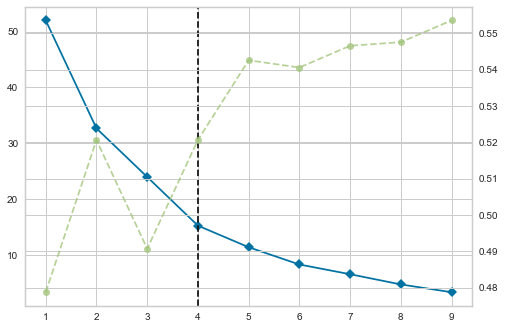

In [23]:
# 자동으로 k를 찾는 k-means

from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(scaler_KK)

# !pip install -U yellowbrick

# !pip uninstall scikit-learn -y 해결~^^ ㅠㅠ 
# !pip3 install scikit-learn 다시설치해줘야함

In [24]:
# 스케일된 데이터를 넣어 클러스터링
kmeans = KMeans(n_clusters=4, random_state=0) # k값은 아까 구한 값
clusters = kmeans.fit(scaler_KK)

#클러스터링 변수인 clusters 값을 원본 데이터 내에 넣기 
data_KK['cluster'] = clusters.labels_
data_KK

C:\Anaconda\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\user\AppData\Local\Temp/ipykernel_19156/910879899.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_KK['cluster'] = clusters.labels_


,CCTV,Oneperson,Pub,Crime,cluster
0,155.518987,1001,5,186,3
4,114.643219,2082,6,178,1
5,182.356389,1919,1,211,0
6,190.954274,1287,2,208,0
7,174.807988,1497,4,200,0
10,173.769339,2158,5,239,1
11,133.394495,2066,3,196,1
13,146.965400,1617,2,144,2
15,208.718861,1288,1,140,0
16,155.207486,1395,0,104,2


In [25]:
data_KK.groupby('cluster').count() # cluster를 기준으로 데이터 개수 세기

,CCTV,Oneperson,Pub,Crime
cluster,,,,
0,6,6,6,6
1,3,3,3,3
2,2,2,2,2
3,2,2,2,2


In [26]:
#그룹별 특징을 알아보자! -그룹별 평균값
data_KK.groupby('cluster').mean() # 군집 1과 2가 제일 위험함

,CCTV,Oneperson,Pub,Crime
cluster,,,,
0,190.981278,1460.333333,1.500000,190.833333
1,140.602351,2102.000000,4.666667,204.333333
2,151.086443,1506.000000,1.000000,124.000000
3,149.205522,1150.000000,5.000000,199.500000


In [27]:
# 5개의 변수를 2개의 변수로 줄이는 작업을 통해, 2차원 그래프로 나타내봅니다.
# 이것이 바로 '차원 축소'인데요,
# 대표적인 차원 축소 방법인 PCA(Principal Component Analysis)를 수행합니다.

from sklearn.decomposition import PCA 
X_KK = scaler_KK.copy() # 표준화 변수를 copy한 새로운 변수 'X'를 만들어 PCA를 적용

#객체
pca = PCA(n_components=2) # 2개로 축소

#적용
pca.fit(X_KK)
x_pca_KK = pca.transform(X_KK)
x_pca_KK

array([[ 0.17016124,  0.30227507],
       [ 2.59849978,  1.30463616],
       [-0.0600633 , -0.98454986],
       [-0.79331055, -1.04422324],
       [ 0.30916742, -0.51491475],
       [ 1.92823956, -1.4433463 ],
       [ 1.51048831,  0.46820253],
       [-0.2079889 ,  1.37521293],
       [-2.16888548,  0.07465383],
       [-1.69494506,  2.10982155],
       [-1.79785469, -0.61091454],
       [ 1.09875882, -0.04694695],
       [-0.89226714, -0.98990643]])

In [ ]:
data_KK

In [40]:
#x_pca를 보기 쉽게 데이터프레임으로 만들기
pca_df_KK = pd.DataFrame(x_pca_KK)
pca_df_KK

,0,1
0,0.170161,0.302275
1,2.598500,1.304636
2,-0.060063,-0.984550
3,-0.793311,-1.044223
4,0.309167,-0.514915
5,1.928240,-1.443346
6,1.510488,0.468203
7,-0.207989,1.375213
8,-2.168885,0.074654
9,-1.694945,2.109822


In [41]:
# pca_df_KK['Test'] = data_KK['cluster'] 
# pca_df_KK
# nan 값이 뜨면서 제대로 들어가지지 않음

pca_df_KK.insert(2,'cluster', [3, 1, 0, 0, 0, 1, 1, 2, 0, 2, 0, 3, 0])

C:\Anaconda\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


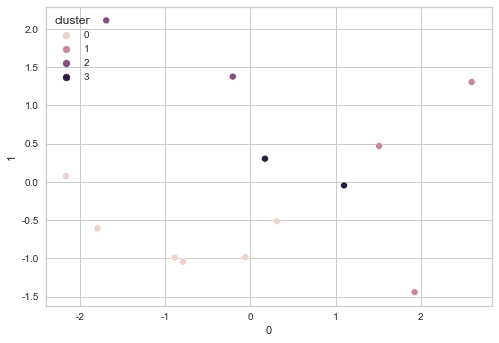

In [42]:
# 시각화하기

axs = plt.subplots()
axs_KK = sns.scatterplot(0, 1, hue='cluster', data=pca_df_KK)